## Keras - Reconhecimento de Dígitos (MNIST)

In [1]:
!nvidia-smi

Wed Apr  2 20:34:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
%matplotlib inline

## Carregando arquivo de dígitos

In [62]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("y_test original shape", X_test.shape, y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
y_test original shape (10000, 28, 28) (10000,)


Let's look at some examples of the training data

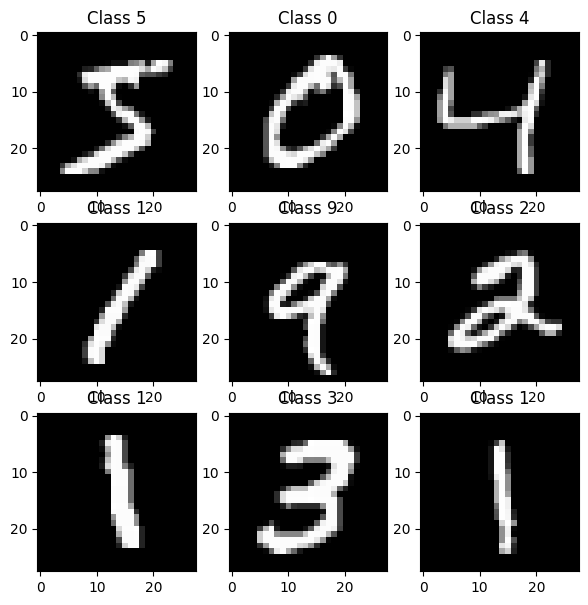

In [63]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Formatar e  Colocar os dados em Escala
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [64]:
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [54]:
# codificação ONE-HOT ENCODING
# Y_train = to_categorical(y_train, nb_classes)
# Y_test = to_categorical(y_test, nb_classes)

In [7]:
# Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Construindo a Rede Neural
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/figure.png" />

In [65]:
import tensorflow as tf

input_shape = (28, 28, 1)
num_classes = 10

# model = Sequential()
# model.add(Input(shape=input_shape))
# model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
#                               # of the layer above. Here, with a "rectified linear unit",
#                               # we clamp all values below 0 to 0.

# #model.add(Dropout(0.3))   # Dropout helps protect the model from memorizing or "overfitting" the training data
# model.add(Dense(512))
# model.add(Activation('relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(10))
# model.add(Activation('softmax')) # This special "softmax" activation among other things,
#                                  # ensures the output is a valid probaility distribution, that is
#                                  # that its values are all non-negative and sum to 1.


model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

## Compile the model


In [66]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [67]:
%%time

# Reshape X_train and X_test to match the expected input shape
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)    # Reshape to (num_samples, 28, 28, 1)

# Convert y_train to one-hot encoding using to_categorical
#from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=10) # Ensure num_classes matches your model's output
y_test_encoded = to_categorical(y_test, num_classes=10)   # Ensure num_classes matches your model's output

model.fit(X_train, y_train_encoded,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, y_test_encoded))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7584 - loss: 0.7895 - val_accuracy: 0.9648 - val_loss: 0.1110
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9563 - loss: 0.1482 - val_accuracy: 0.9785 - val_loss: 0.0697
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9689 - loss: 0.1009 - val_accuracy: 0.9812 - val_loss: 0.0565
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9752 - loss: 0.0841 - val_accuracy: 0.9830 - val_loss: 0.0512
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9778 - loss: 0.0732 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9808 - loss: 0.0659 - val_accuracy: 0.9868 - val_loss: 0.0372
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9826 - loss: 0.0571 - val_accuracy: 0.9880 - val_loss: 0.0348
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 0

## Finally, evaluate its performance

In [70]:
#loss = model.evaluate(X_test, Y_test,verbose=0)
#print('Acurácia de teste:', 1 - loss)

_, acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.130


# CNN Model

![image](https://lh4.googleusercontent.com/ojMXAE77tiVVF3RSqK1lldysJx5OzBJdE5ng_0w7GpHYWl9GR9jjBN0p56UFW3dM3gEdS-0oTOw0IjORJXVImFvcXdD-EnFibJl06gxMN_kYTeOyfmanNEvXK59CYzt2t_3DifPG)

In [12]:
# define cnn model
model = Sequential() # 32
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', Input(shape=(28, 28, 1)) ) ) #
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) #))
model.add(Dense(10, activation='softmax'))

# compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │       1,843,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,993,174 (7.60 MB)

 Trainable params: 1,993,174 (7.60 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# reshape dataset to have a single channel
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print("y Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
y Testing matrix shape (10000, 10)


# Particiona em Treino e Validação o dataset de Treino

In [72]:
# Particiona em Treino e Validação o dataset de Treino

X_valid=X_train[55000:]
y_valid=Y_train[55000:]

X_train=X_train[:55000]
y_train=y_train[:55000]
y_train = to_categorical(y_train)


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_valid.shape)

Training matrix shape (55000, 28, 28, 1)
Testing matrix shape (5000, 28, 28, 1)


In [73]:
%%time

history = model.fit(X_train, y_train,
                    epochs=20, #10, #20, # 6
                    batch_size=512, #512,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9952 - val_loss: 0.0167
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9894 - loss: 0.0314 - val_accuracy: 0.9950 - val_loss: 0.0186
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9950 - val_loss: 0.0201
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9938 - val_loss: 0.0196
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9946 - val_loss: 0.0185
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9919 - loss: 0.0243 - val_accuracy: 0.9944 - val_loss: 0.0196
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9946 - val_loss: 0.0225
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 

# Avaliando meu Modelo

In [74]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.280


# Resultados - Métricas Pesos Sinápticos e Hiperparâmetros

In [75]:
history.__dict__

{'params': {'verbose': 1, 'epochs': 20, 'steps': 108},
 '_model': <Sequential name=sequential_11, built=True>,
 'history': {'accuracy': [0.9899818301200867,
   0.9893636107444763,
   0.9910545349121094,
   0.9910727143287659,
   0.9905999898910522,
   0.9914727210998535,
   0.9915454387664795,
   0.9912909269332886,
   0.991454541683197,
   0.9916545748710632,
   0.9919272661209106,
   0.9920181632041931,
   0.9918363690376282,
   0.9913454651832581,
   0.9922000169754028,
   0.9925636649131775,
   0.9922909140586853,
   0.993254542350769,
   0.9924727082252502,
   0.9923636317253113],
  'loss': [0.03125479072332382,
   0.032034046947956085,
   0.02829744480550289,
   0.029761705547571182,
   0.028256980702280998,
   0.027339251711964607,
   0.026906196027994156,
   0.026554672047495842,
   0.025764409452676773,
   0.025087211281061172,
   0.025223011150956154,
   0.02451889030635357,
   0.02514764480292797,
   0.02543853595852852,
   0.023699993267655373,
   0.02277953363955021,
   0.

In [76]:
acc = history.history['accuracy']
acc

[0.9899818301200867,
 0.9893636107444763,
 0.9910545349121094,
 0.9910727143287659,
 0.9905999898910522,
 0.9914727210998535,
 0.9915454387664795,
 0.9912909269332886,
 0.991454541683197,
 0.9916545748710632,
 0.9919272661209106,
 0.9920181632041931,
 0.9918363690376282,
 0.9913454651832581,
 0.9922000169754028,
 0.9925636649131775,
 0.9922909140586853,
 0.993254542350769,
 0.9924727082252502,
 0.9923636317253113]

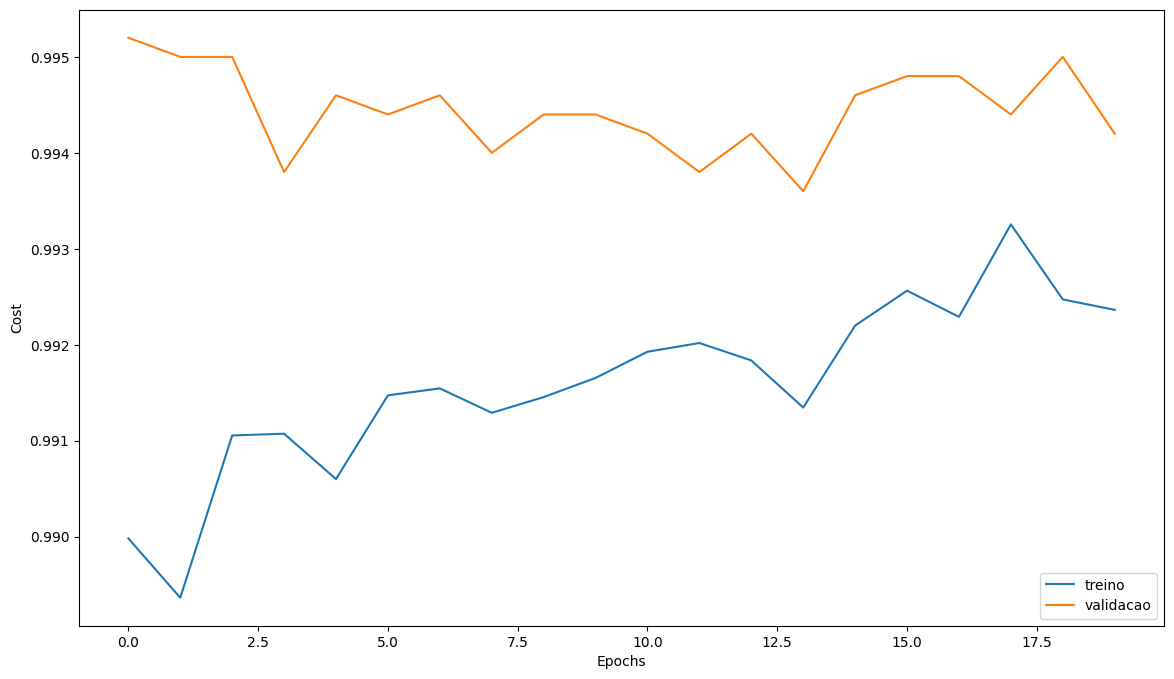

In [77]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14,8]

acc = history.history['accuracy']

plt.plot(history.epoch, acc)
plt.plot(history.epoch, history.history['val_accuracy'] )
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.legend(['treino', 'validacao'])
plt.show()

## Plotando algumas predições erradas do conjunto de teste

In [80]:
np.set_printoptions(suppress=True, precision=30)

predict_x = model.predict(X_test)[0]
classe = np.argmax(predict_x)
print(predict_x)
print(classe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.00000000033514408       0.00000000017485252
 0.00000042783637          0.0000001353936
 0.00000000000088348426    0.000000000039636527
 0.00000000000000010815243 0.99999905
 0.0000000005778116        0.00000032149558         ]
7


In [81]:
predict_x = model.predict (X_test)[0]
classes_x= np.argmax(predict_x)
classes_x

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.int64(7)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


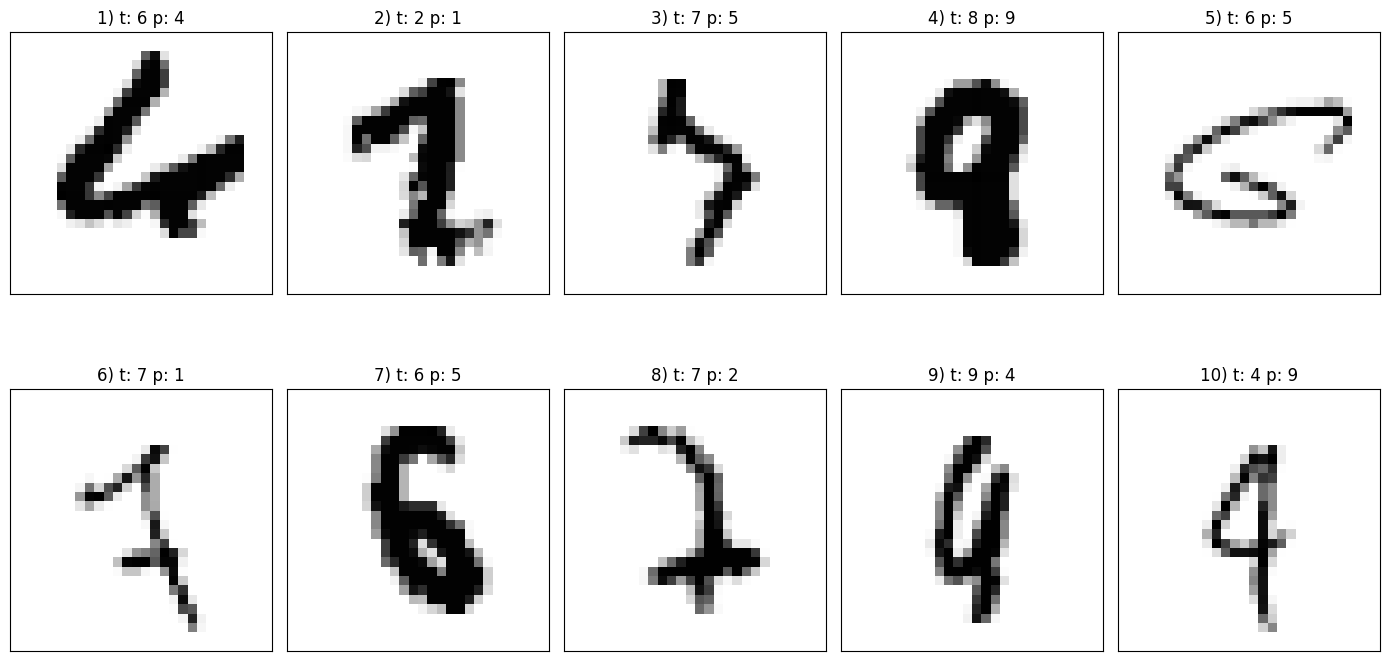

In [82]:
# classificações incorretas
predict_x = model.predict(X_test)
y_test_pred = np.argmax(predict_x, axis=1)

#y_test_pred = np_utils.to_categorical(y_test_pred, nb_classes)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Plotando algumas predições Corretas do conjunto de teste

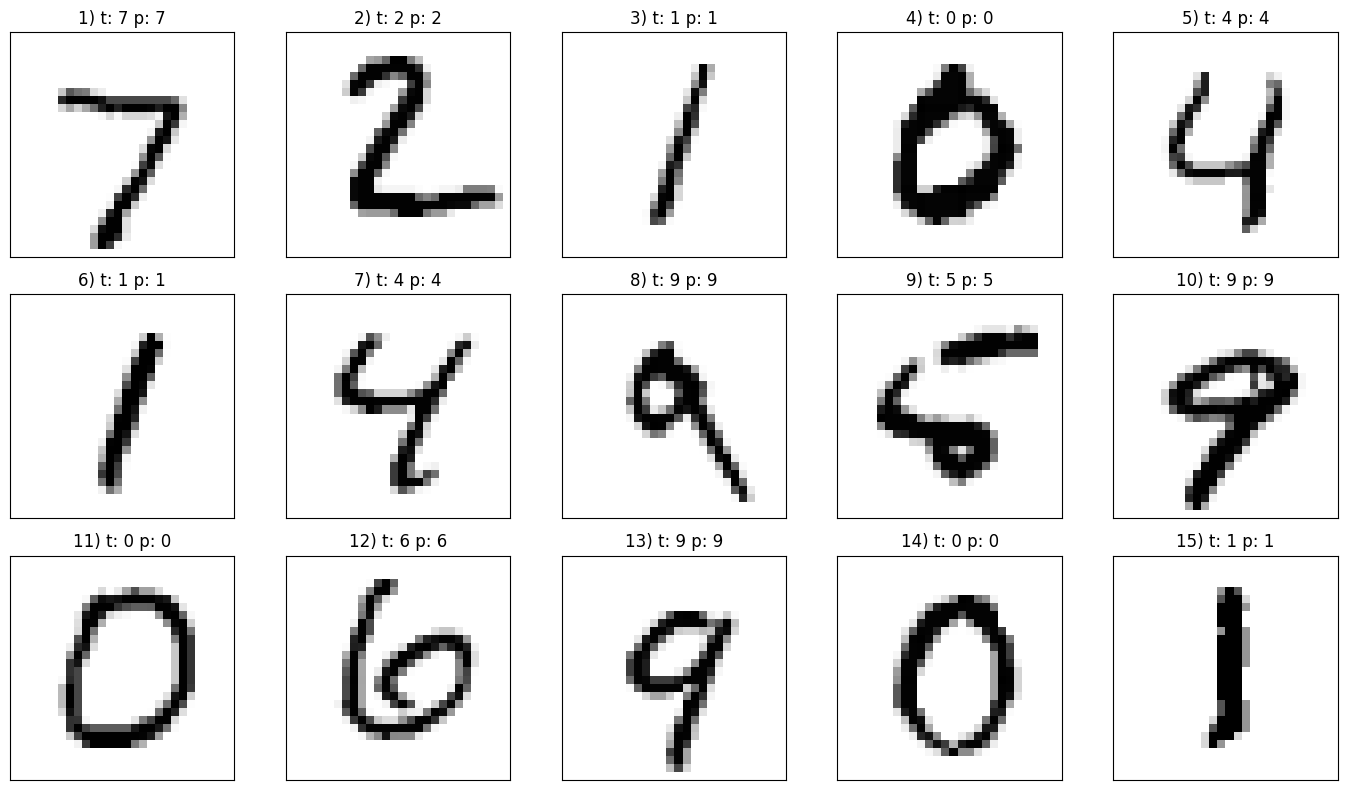

In [83]:
# classificações corretas
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab = y_test_pred[y_test == y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Salvando o modelo

In [85]:
model.save('modelo.keras')
!ls -ilah *.keras

660510 -rw-r--r-- 1 root root 304K Apr  2 21:11 modelo.keras


# Carregando o modelo Salvo

In [86]:
loaded_model = load_model('modelo.keras')
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.280


# Download do modelo

In [87]:
%%time
from google.colab import files
files.download('modelo.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 2.66 ms, sys: 1.11 ms, total: 3.77 ms
Wall time: 3.27 ms
